In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [4]:
# Display basic info
df.info()

# Display summary statistics
df.describe(include='all')

# Count and display number of duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
Number of duplicate rows: 0


In [5]:
# Show missing values count per column
df.isnull().sum()

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

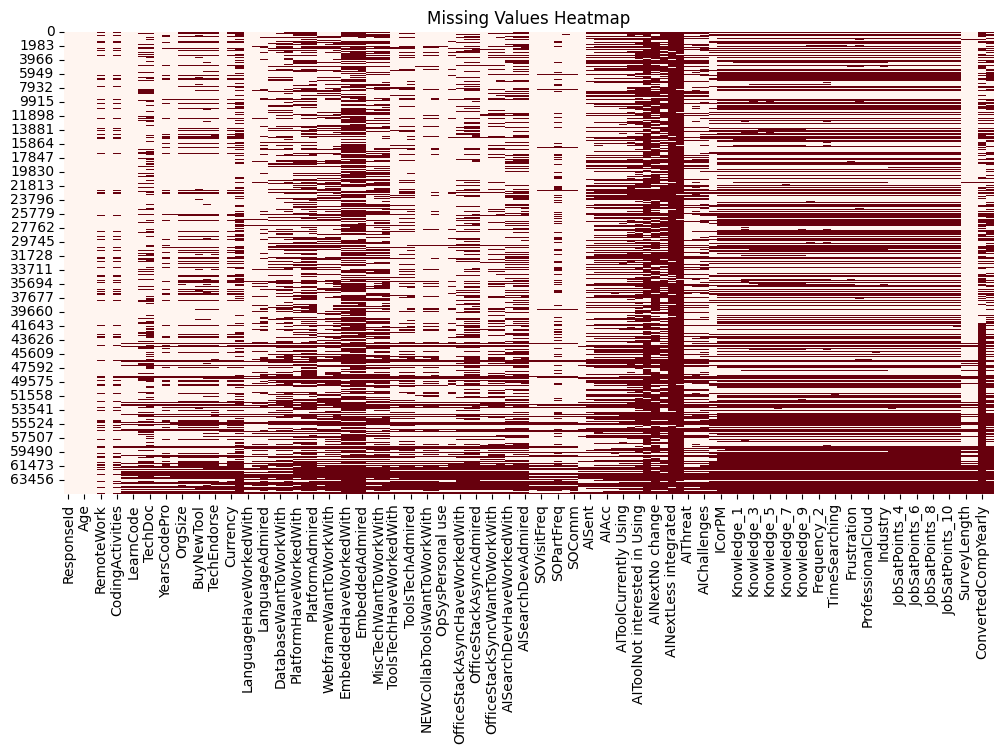

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="Reds")
plt.title("Missing Values Heatmap")
plt.show()

In [7]:
df['Employment'].isnull().sum()

np.int64(0)

In [8]:
most_common_employment = df['Employment'].mode()[0]
print(most_common_employment)

Employed, full-time


In [9]:
df['Employment'] = df['Employment'].fillna(most_common_employment)

C:\Users\Rakesh\AppData\Local\Temp\ipykernel_13216\783135420.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


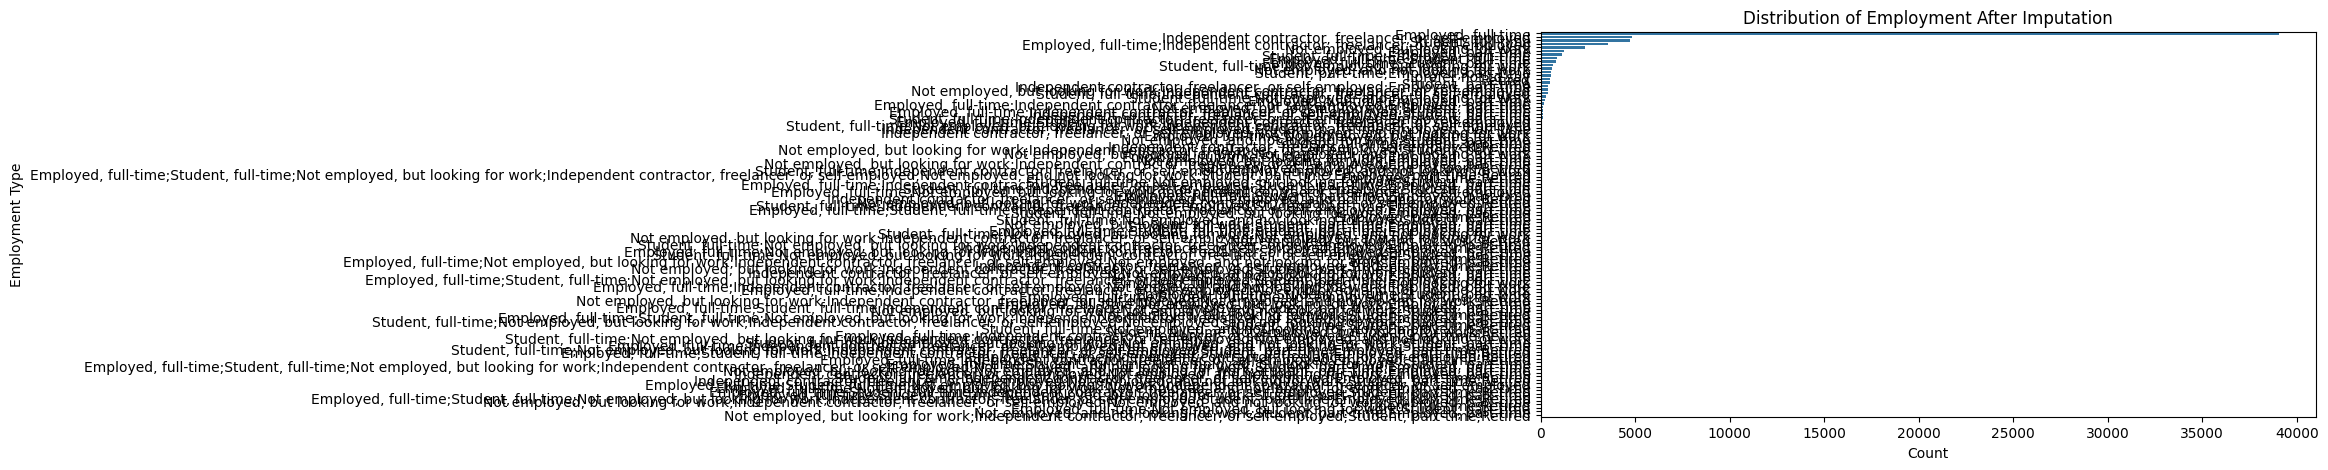

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='Employment', order=df['Employment'].value_counts().index)
plt.title('Distribution of Employment After Imputation')
plt.xlabel('Count')
plt.ylabel('Employment Type')
plt.tight_layout()
plt.show()

Missing values in 'Employment': 0


C:\Users\Rakesh\AppData\Local\Temp\ipykernel_13216\2520873887.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Employment'].fillna(most_frequent, inplace=True)
C:\Users\Rakesh\AppData\Local\Temp\ipykernel_13216\2520873887.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Employment_Grouped', order=df['Employment_Grouped'].value_counts().index, palette='S

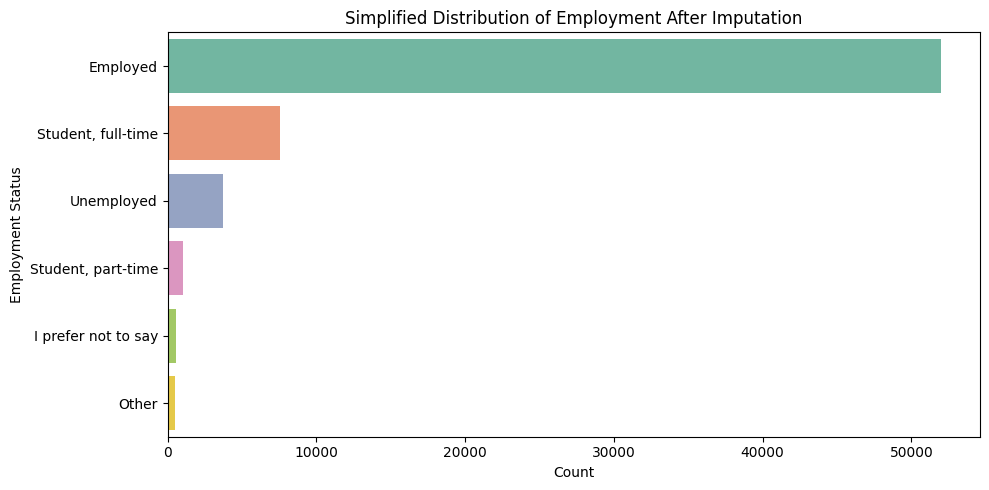

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Count missing values in Employment
missing_count = df['Employment'].isnull().sum()
print("Missing values in 'Employment':", missing_count)

# Step 2: Impute with most frequent value (mode)
most_frequent = df['Employment'].mode()[0]
df['Employment'].fillna(most_frequent, inplace=True)

# Step 3: Simplify and group employment values
employment_mapping = {
    'Employed, full-time': 'Employed',
    'Employed, part-time': 'Employed',
    'Independent contractor, freelancer, or self-employed': 'Employed',
    'I am a student who is working part-time': 'Student',
    'I am a student who is not working': 'Student',
    'Not employed, but looking for work': 'Unemployed',
    'Not employed, and not looking for work': 'Unemployed',
    'Retired': 'Other',
    'Prefer not to say': 'Other',
    # Add more mappings if needed
}

# If values are combined (e.g., "Employed, full-time; Student, part-time"), split and simplify
df['Employment_Clean'] = df['Employment'].str.split(';').str[0].str.strip()
df['Employment_Grouped'] = df['Employment_Clean'].replace(employment_mapping)

# Step 4: Visualize the cleaned Employment data
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='Employment_Grouped', order=df['Employment_Grouped'].value_counts().index, palette='Set2')
plt.title('Simplified Distribution of Employment After Imputation')
plt.xlabel('Count')
plt.ylabel('Employment Status')
plt.tight_layout()
plt.show()